In [1]:
# importing needed libraries and packages
import numpy as np
import pandas as pd

In [2]:
# mounting google drive to Colab Runtime environment
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Loading and Getting a Glimpse of the Dataset

In [3]:
# loading dataset
# in this dataset, the data are separated using ';' symbol. Therefore, when reading the CSV, 
# we should instruct the Pandas DataFrame about the separater. This is because the default separater is the ',' 
# and that if we do not specify, the DataFrame will have all the row data into one cell.
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/bank-full.csv',sep=';')

data2=data

# getting a glimpse of the data
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# we use value_counts() to display how many instances are present in the
# categorical feature/class variable
data['y'].value_counts()


no     39922
yes     5289
Name: y, dtype: int64

By considering the counts of the class variable, we could see that the dataset is an imbalanced dataset, since the number of 'no' are almost 8 times the 'yes' class. In this tutorial, i will not be handling the class imbalance, but can be handled by techniques such as SMOTE.

Ref: https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/#:~:text=SMOTE%20is%20an%20oversampling%20technique,problem%20posed%20by%20random%20oversampling.

# Preprocessing Data

Preprocessing data includes handling missing values and outliers, applying feature coding techniques if needed, scale & standardize features.

**Checking for Missing values**




In [5]:
# isnull() method can be used to check each cell in the dataset
data.isnull()           

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


isnull() returns True if the cell contains a missing value and False otherwise.
However, since the dataset is large, it is impractical for us to manually check all True, False values.
Therefore, we will try to get a summary of the missing values in the dataset as follows.

In [6]:
# Finding total standard missing values for each feature
print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


When using Pandas, we can find the standard missing values (missing values that Pandas can detect) using isnull() and get a summary of the missing values using isnull().sum().

Ref: https://towardsdatascience.com/data-cleaning-with-python-and-pandas-detecting-missing-values-3e9c6ebcf78b

In [7]:
# Making a list of missing value types
missing_values = ["unknown"]

# reading the data again, with the defined non-standard missing value
new_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/data/bank-full.csv',sep=';', na_values = missing_values)

print(new_data.isnull().sum())

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64


According to the above output, we can see that 4 features contain values as 'unknown', which is a non-standard missing value. However, I have not removed them. *These 'unknown' missing values were treated as separate feature values in my model creation*. This is because these missing values may not be random and may themselves be information.

**Handling Outliers**

We check for outliers only in the features that contain numerical values.

1. Checking the 'age' feature for outliers

Age Shape: (45211, 17)


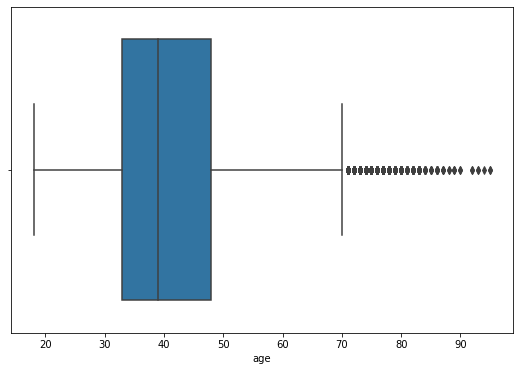

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for age feature
print("Age Shape:",data.shape)
## Max and Min Quantile
max_val = data.age.quantile(0.75)
min_val = data.age.quantile(0.25)

sns.boxplot(data['age'])
plt.show()

When checking the boxplot for the **age** feature, we can see that there are no significant outliers, and that there are many datapoints that are outside the boxplot. Therefore, i will not be removing the datapoints that are identified here as outliers, since they can carry information in them.

2. Checking the **balance** feature for outliers

Balance Shape: (45211, 17)


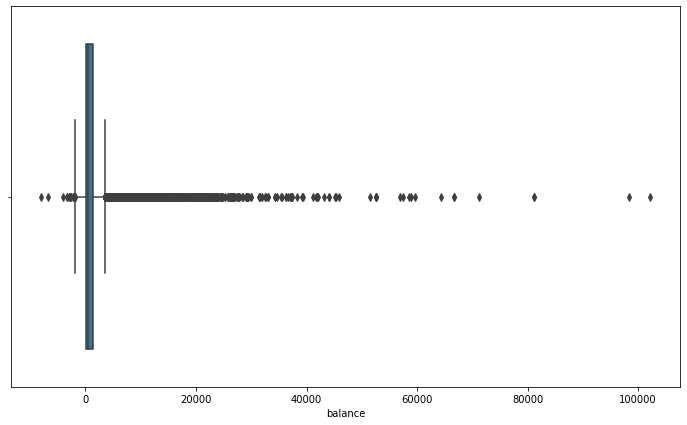

72.0


In [9]:
fig, axes = plt.subplots(figsize=(12, 7))

# Checking the box plot for balance feature
print("Balance Shape:",data.shape)
## Max and Min Quantile
max_val = data.balance.quantile(0.75)
min_val = data.balance.quantile(0.25)

sns.boxplot(data['balance'])
plt.show()
print(min_val)

When checking the above visualized boxplot for the **balance** feature, we can see that eventhough there are many data points outside the boxplot as in the age boxplot, we can point out a range where the datapoints start to spread wider. Therefore, i will manually set the cutoff region for outliers as balance < -6000 and balance > 50000, which is purely out of my discretion.

After Balance Shape: (45191, 17)


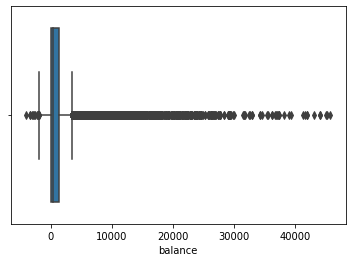

In [10]:
# removing datapoints that have balance values greater than 50000 and less than -6000
data = data[(data['balance']>-6000) & (data['balance']<50000)]

print("After Balance Shape:",data.shape)

sns.boxplot(data['balance'])
plt.show()

3. Checking outliers for **day** feature

Day Shape: (45191, 17)


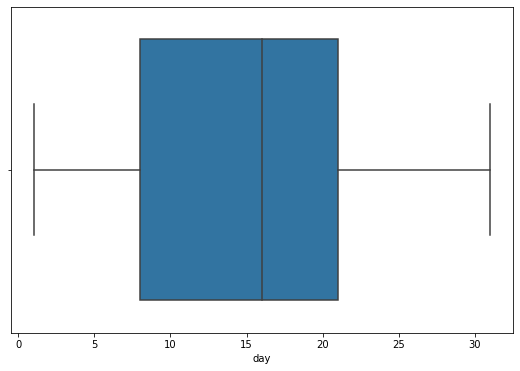

In [11]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for day feature
print("Day Shape:",data.shape)
## Max and Min Quantile
max_val = data.balance.quantile(0.75)
min_val = data.balance.quantile(0.25)

sns.boxplot(data['day'])
plt.show()

There are no outliers in the day feature.

4. Checking outliers for **duration** feature

Duration Shape: (45191, 17)


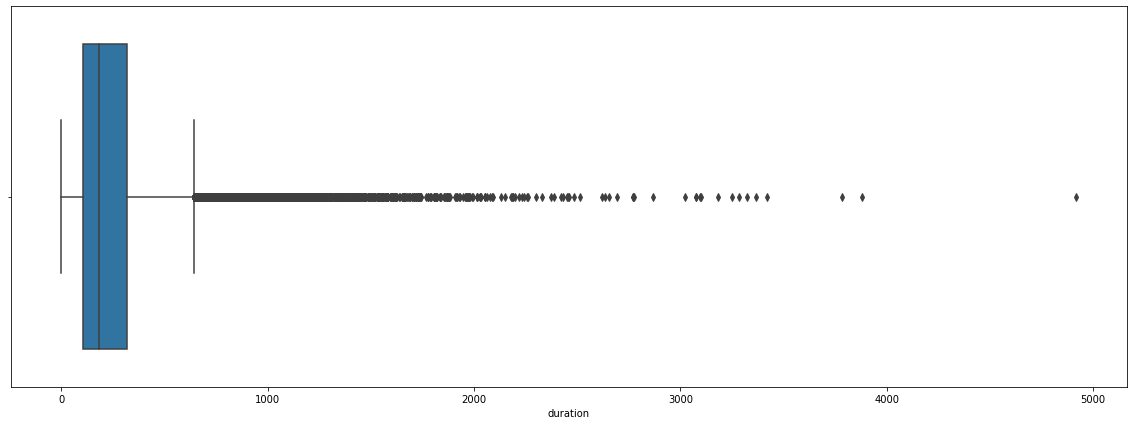

In [12]:
fig, axes = plt.subplots(figsize=(20, 7))

# Checking the box plot for duration feature
print("Duration Shape:",data.shape)
## Max and Min Quantile
max_val = data.balance.quantile(0.75)
min_val = data.balance.quantile(0.25)

sns.boxplot(data['duration'])
plt.show()

When checking the above box plot, we can see that, there a significant gap has first occured around the duration value 2600. Therefore i decided to clear the datapoints after duration 2600 as handling outliers in this feature.

After Duration Shape: (45169, 17)


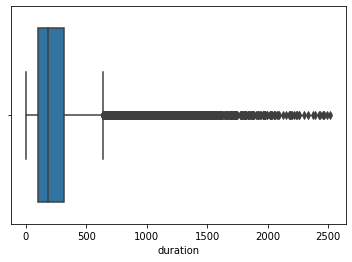

In [13]:
# removing datapoints that have duration values greater than 2600
data = data[(data['duration']<2600)]

print("After Duration Shape:",data.shape)

sns.boxplot(data['duration'])
plt.show()

We can see that after removing the aforesaid outliers, the number of datapoints in the dataset has been educed to 45169.

5. Checking outliers in **campaign** feature

Campaign Shape: (45169, 17)


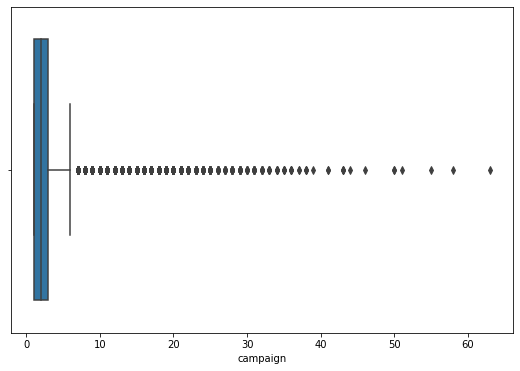

In [14]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for campaign feature
print("Campaign Shape:",data.shape)
## Max and Min Quantile
max_val = data.campaign.quantile(0.75)
min_val = data.campaign.quantile(0.25)

sns.boxplot(data['campaign'])
plt.show()

When checking the boxplot visualization, we can see that a break has occured in the datapoints outside the boxplot aroung the campaign count 40. Therefore, i will be clearing the datapoints that has campaign contact count more than 40.

After Campaign Shape: (45156, 17)


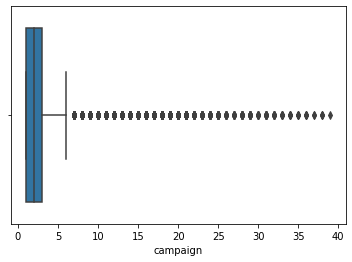

In [15]:
# removing datapoints that have campaign values greater than 2600
data = data[(data['campaign']<40)]

print("After Campaign Shape:",data.shape)

sns.boxplot(data['campaign'])
plt.show()

6. Checking outliers in **pdays** feature

pdays Shape: (45156, 17)


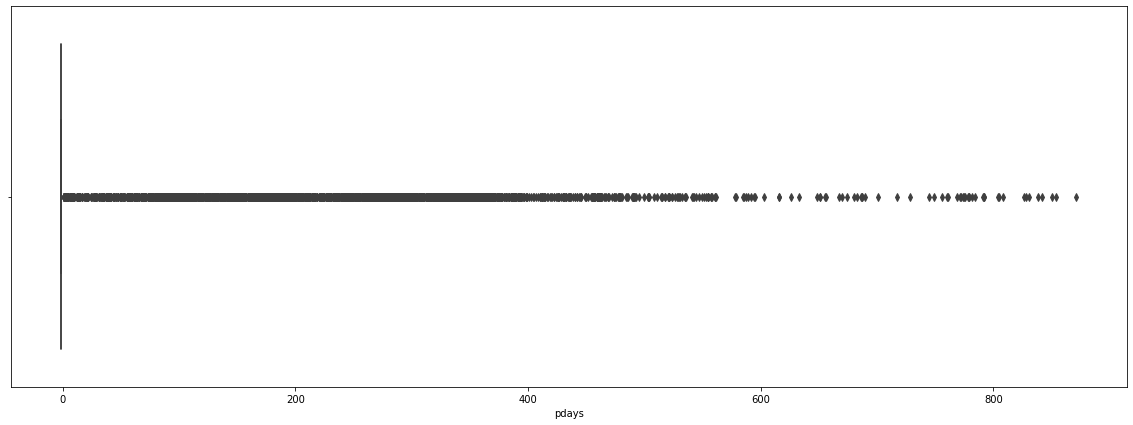

In [16]:
fig, axes = plt.subplots(figsize=(20, 7))

# Checking the box plot for pdays feature
print("pdays Shape:",data.shape)
## Max and Min Quantile
max_val = data.pdays.quantile(0.75)
min_val = data.pdays.quantile(0.25)

sns.boxplot(data['pdays'])
plt.show()

We can see that the values has started breaking from a point aroung 580 pdays.
Therefore i will be removing the outliers after pdays = 575

After pdays Shape: (45095, 17)


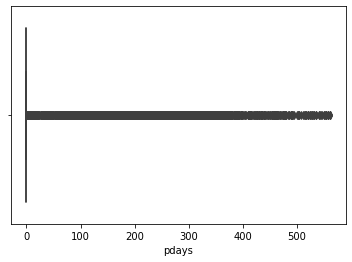

In [17]:
# removing datapoints that have pdays values greater than 575
data = data[(data['pdays']<575)]

print("After pdays Shape:",data.shape)

sns.boxplot(data['pdays'])
plt.show()

7. Checking outliers in the **previous** feature

previous Shape: (45095, 17)


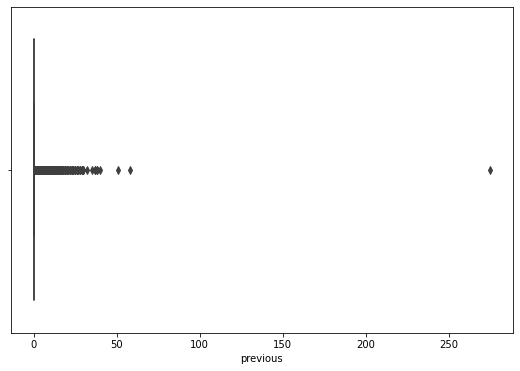

In [18]:
fig, axes = plt.subplots(figsize=(9, 6))

# Checking the box plot for previous feature
print("previous Shape:",data.shape)
## Max and Min Quantile
max_val = data.previous.quantile(0.75)
min_val = data.previous.quantile(0.25)

sns.boxplot(data['previous'])
plt.show()

We can see 3 clear outliers after 50 range. Therefore, i will be removing outliers after previous = 50.

After previous Shape: (45092, 17)


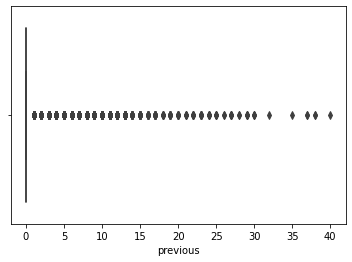

In [19]:
# removing datapoints that have previous values greater than 50
data = data[(data['previous']<50)]

print("After previous Shape:",data.shape)

sns.boxplot(data['previous'])
plt.show()

Now, after careful inspection of all the numerical fields (features) in the dataset, i have removed outliers and the remaining number datapoints of datapoints is 45092.
Therefore, we have removed 45211 - 45092 = 119 outliers.

**Feature Enoding**

In this process, the categorical data are encoded into numerical data. The LabelEncoder is used to encode the class values to integers accordingly as follows.

In [20]:
from sklearn.preprocessing import LabelEncoder

# encode strings to integer
data['y'] = LabelEncoder().fit_transform(data['y'])
data['y']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45092, dtype: int64

There was one feature that can be considered as having Categorical Ordinal data type; education. This is because when considering the values present in this field, an order can be seen as secondary, tertiary etc.
This feature was converted to numerical representation using mapping as follows.

Refer: https://www.dezyre.com/recipes/encode-ordinal-categorical-features-in-python

In [21]:
from sklearn.preprocessing import OrdinalEncoder

# checking the values in education field
data['education'].value_counts()

education_mapper = {"unknown":-1, "primary":1, "secondary":2, "tertiary":3}
data["education"] = data["education"].replace(education_mapper)
data


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,2,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,2,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,-1,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,-1,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,1,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,2,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,2,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


**Removing Unwanted Features**

The feature **duration** contains last contact duration, in seconds.

As said by the data source, this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Therefore, i have decided to remove the feature **duration** from the dataset used for prediction.

Refer: https://www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/

In [22]:
# data.drop(['duration', 'contact','month','day'], inplace=True, axis = 1)
data.drop(['duration'], inplace=True, axis = 1)

# inplace=True means the operation would work on the original object. axis=1 means we are dropping the column, not the row.

data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,3,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,0
1,44,technician,single,2,no,29,yes,no,unknown,5,may,1,-1,0,unknown,0
2,33,entrepreneur,married,2,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,0
3,47,blue-collar,married,-1,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,0
4,33,unknown,single,-1,no,1,no,no,unknown,5,may,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3,no,825,no,no,cellular,17,nov,3,-1,0,unknown,1
45207,71,retired,divorced,1,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,1
45208,72,retired,married,2,no,5715,no,no,cellular,17,nov,5,184,3,success,1
45209,57,blue-collar,married,2,no,668,no,no,telephone,17,nov,4,-1,0,unknown,0


OneHot Encoding is used to encode the categorical features - 'job', 'marital', 'contact', 'month', 'poutcome' as follows

Ref: https://github.com/renowator/Skillsoft-AI-Apprentice-labs/blob/master/Lab4_MLP_Classification.ipynb

In [23]:
# Using OneHotEncoding pandas.get_dummies

# listing down the features that has categorical data
categorial_features = ['job', 'marital', 'contact', 'month', 'poutcome']
# categorial_features = ['job', 'marital', 'poutcome']
for item in categorial_features:
    # assigning the encoded data into a new DataFrame object
    df = pd.get_dummies(data[item], prefix=item)
    data = data.drop(item, axis=1)
    for categorial_feature in df.columns:
        #Set the new column in data to have corresponding df values
        data[categorial_feature] = df[categorial_feature]


In [24]:
binary_valued_features = ['default','housing', 'loan']
bin_dict = {'yes':1, 'no':0}

#Replace binary values in data using the provided dictionary
for item in binary_valued_features:
    data.replace({item:bin_dict},inplace=True)

After this point, we have encoded all the values in the dataset into numerical values

In [25]:
# rearrange the columns in the dataset to contain the y (target/label) at the end

cols = list(data.columns.values)
cols.pop(cols.index('y')) # pop y out of the list
data = data[cols+['y']] #Create new dataframe with columns in new order

The above code fragment was written because while encoding the categorical data using OneHotEncoding, the new columns were appended to the end of the dataset and the y (target) column was not at the end anymore.

Ref: https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe

In [26]:
# checking the final info about the dataset 
data.describe()

,age,education,default,balance,housing,loan,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
count,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000,45092.000000
mean,40.929899,2.019139,0.018030,1337.164730,0.556041,0.160206,15.807416,2.752905,39.302249,0.567019,0.114388,0.215160,0.032888,0.027455,0.208973,0.050053,0.034906,0.092012,0.020802,0.168212,0.028786,0.006365,0.115165,0.601814,0.283021,0.648053,0.064202,0.287745,0.064890,0.138206,0.004724,0.058636,0.031048,0.152555,0.118025,0.010490,0.304999,0.087954,0.016123,0.012353,0.107713,0.040384,0.033421,0.818482,0.116406
std,10.614841,0.902716,0.133061,2742.702618,0.496855,0.366801,8.321816,3.000820,97.020071,1.844048,0.318286,0.410938,0.178346,0.163407,0.406579,0.218057,0.183545,0.289046,0.142722,0.374058,0.167205,0.079526,0.319224,0.489530,0.450472,0.477583,0.245115,0.452717,0.246334,0.345120,0.068567,0.234944,0.173448,0.359562,0.322642,0.101882,0.460412,0.283230,0.125948,0.110455,0.310021,0.196861,0.179734,0.385451,0.320715
min,18.000000,-1.000000,0.000000,-4057.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,2.000000,0.000000,72.000000,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,39.000000,2.000000,0.000000,448.000000,1.000000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,48.000000,3.000000,0.000000,1425.000000,1.000000,0.000000,21.000000,3.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,3.000000,1.000000,45789.000000,1.000000,1.000000,31.000000,39.000000,562.000000,40.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1

**Splitting the Data**

In [27]:
y = data['y']
X = data.values[:, :-1] # get all columns except the last column

# spliting training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=50)

Here when using train_test_split, we use a random_state initializing value to make sure that the data splitting is done in the same way even in a different run of the code.

Ref: https://www.researchgate.net/post/Why_random_state_in_train_test_split_is_equal_42#:~:text=train_test_split)%2C%20is%20recommended%20to%20used,results%20across%20a%20different%20run.

**Feature Scaling**

After encoding categorical data, the dataset consists of features with different data ranges. These values are standardized and feature scaling is done as follows. Numerical features were scaled by removing the
mean and by scaling to unit variance (StandardScaler) as follows.

In [28]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()  
scaler.fit(X)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [29]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Feature Engineering

Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve. Irrelevant or partially relevant features can negatively impact model performance.

**Drawing the Correlation Matrix**

Therefore I will be performing the Correlation Coefficient checking mechanism in order to check the relationship between the different features with the output.

Each of those correlation types can exist in a spectrum represented by values from 0 to 1 where slightly or highly positive correlation features can be something like 0.5 or 0.7. If there is a strong and perfect positive correlation, then the result is represented by a correlation score value of 0.9 or 1.

Ref: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e
https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/
https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4#:~:text=Each%20of%20those%20correlation%20types,value%20of%200.9%20or%201.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,1.000000,-0.164160,-0.015227,0.086632,-0.179804,-0.016287,-0.007087,0.005524,-0.026688,0.002297,-0.053430,-0.046026,0.021753,0.089869,-0.024640,0.447124,-0.007664,-0.059451,-0.199933,-0.071419,0.003076,0.049217,0.167251,0.284552,-0.427703,-0.070286,0.167962,-0.016785,-0.028933,0.075142,0.019249,-0.004771,-0.007162,0.003489,0.052429,0.022825,-0.125761,0.029050,0.061120,0.033475,-0.008377,-0.021871,0.032141,0.002919
1,-0.164160,1.000000,-0.008288,0.046873,-0.021548,0.015159,0.018139,0.001410,0.006897,0.026724,-0.022010,-0.306875,0.030001,-0.091424,0.399608,-0.092202,0.072204,-0.057029,-0.057469,0.062998,-0.014289,-0.118527,0.010131,-0.112360,0.114895,0.151680,-0.072612,-0.120673,0.005041,0.095718,0.000377,0.021399,0.010511,-0.014431,-0.068824,0.018169,-0.068977,0.051460,0.010865,0.001384,0.020024,0.008748,0.028548,-0.033866
2,-0.015227,-0.008288,1.000000,-0.071413,-0.004733,0.070133,0.005912,0.016081,-0.027990,-0.020866,-0.010927,0.012105,0.026482,0.000637,0.002399,-0.010992,-0.000147,-0.005781,-0.018181,-0.003457,0.007834,-0.008266,0.018405,-0.012556,0.000596,-0.009017,-0.015262,0.017772,-0.026545,-0.007383,-0.008984,-0.007702,-0.006785,0.039730,0.006028,-0.014019,-0.002881,0.009799,-0.017395,-0.012491,-0.023488,-0.015419,-0.023613,0.037753
3,0.086632,0.046873,-0.071413,1.000000,-0.064539,-0.090828,0.009663,-0.016481,0.003927,0.025602,-0.026260,-0.051600,0.004680,0.007631,0.068451,0.042482,0.017995,-0.039262,0.005053,-0.012946,0.008774,0.013908,-0.024636,0.023283,-0.007835,0.016282,0.033222,-0.035156,0.017947,0.006771,0.016632,-0.006904,-0.026823,-0.068199,0.033259,0.029632,-0.073507,0.124019,0.045353,0.018811,0.016565,0.008178,0.033107,-0.032908
4,-0.179804,-0.021548,-0.004733,-0.064539,1.000000,0.041551,-0.030964,-0.029192,0.133308,0.043427,0.042950,0.178240,0.015230,-0.079964,-0.068157,-0.154723,-0.027450,0.069399,-0.085552,-0.012886,-0.043150,-0.074612,0.001098,0.018429,-0.020800,-0.153160,-0.078778,0.204181,0.081377,-0.306417,-0.051110,-0.060830,-0.066789,-0.059941,-0.106072,-0.068011,0.426129,0.003226,-0.089980,-0.074278,0.112398,0.037032,-0.087610,-0.068683
5,-0.016287,0.015159,0.070133,-0.090828,0.041551,1.000000,0.010779,0.012088,-0.019148,-0.011602,0.029686,0.022484,0.035442,-0.015702,-0.038554,-0.012232,-0.004260,0.031589,-0.058513,0.011318,-0.034810,-0.031852,0.017297,0.035055,-0.050346,0.012107,-0.006640,-0.009175,-0.024016,-0.070639,-0.020362,-0.009667,-0.006500,0.168922,-0.025250,-0.029853,-0.025027,0.015810,-0.030357,-0.031792,0.000931,-0.007114,-0.052044,0.027069
6,-0.007087,0.018139,0.005912,0.009663,-0.030964,0.010779,1.000000,0.167007,-0.094614,-0.061620,-0.012678,-0.023268,-0.001262,0.003409,0.015127,-0.008760,0.009912,-0.007507,-0.016856,0.034591,-0.003070,-0.008336,-0.000222,0.009161,-0.009796,0.020149,0.025289,-0.034941,0.050078,0.033704,-0.009908,-0.284591,0.248698,0.147445,-0.196811,-0.019449,-0.026958,0.095247,0.028929,-0.053488,-0.069878,-0.033025,-0.028486,0.086364
7,0.005524,0.001410,0.016081,-0.016481,-0.029192,0.012088,0.167007,1.000000,-0.088567,-0.037563,-0.023276,0.004331,0.002232,0.003350,0.018818,-0.030499,0.010929,-0.001459,-0.020584,0.017365,-0.015414,0.012993,-0.019078,0.033837,-0.023241,-0.023260,0.054327,-0.004875,-0.069444,0.159575,-0.010558,-0.028424,-0.062673,0.108861,0.039771,-0.018677,-0.074723,-0.087845,-0.053320,-0.035423,-0.088182,-0.018895,-0.059563,0.108394
8,-0.026688,0.006897,-0.027990,0.003927,0.133308,-0.019148,-0.094614,-0.088567,1.000000,0.555006,0.027819,0.020462,-0.013604,-0.033692,-0.008165,-0.007012,-0.010990,0.007129,0.025585,-0.013921,-0.009360,-0.017314,0.003481,-0.028798,0.028820,0.236325,0.015339,-0.257556,0.149295,-0.112173,0.048476,0.074104,0.056908,-0.140985,-0.117551,0.028234,0.088779,0.013275,0.053665,0.054546,0.715263,0.384932,0.234780,-0.881427
9,0.002297,0.026724,-0.020866,0.025602,0.043427,-0.011602,-0.061620,-0.037563,0.555006,1.

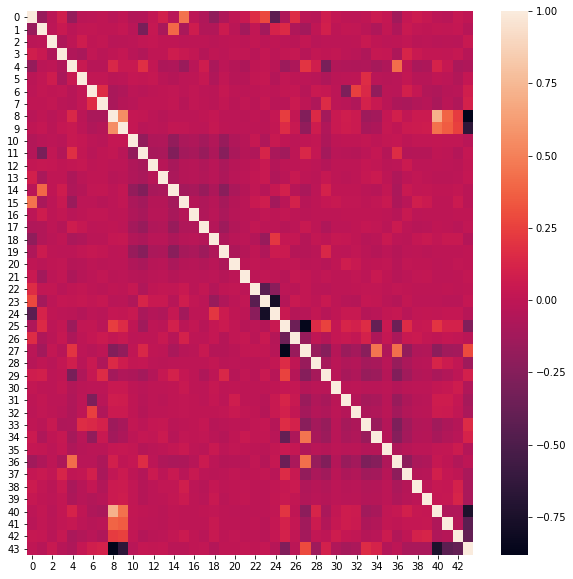

In [30]:
# draw the correlation matrix
correlation_matrix = pd.DataFrame(X_train).corr()
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(correlation_matrix, ax=ax)
correlation_matrix

After generating the correlation matrix, we can see that to the right side of the matrix, there are features that has a very high correlation. We usually remove such features that have high correlations because, they are some what linearly dependent with other features. These features contribute very less in predicting the output but increses the computational cost.

It is clear that correlated features means that they bring the same information, so it is logical to remove one of them.

Ref: https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features#:~:text=It%20is%20clear%20that%20correlated,to%20remove%20one%20of%20them.
https://www.dezyre.com/recipes/drop-out-highly-correlated-features-in-python
https://likegeeks.com/python-correlation-matrix/#:~:text=A%20correlation%20matrix%20is%20a,variables%20in%20a%20given%20data.&text=Each%20row%20and%20column%20represents,the%20corresponding%20row%20and%20column.

In order to find the exact columns that has the high correlation values, i perform the below code. I am checking the upper triangle of the correlation matrux because the uppoer and lower traingles are mirrors of each other that are divided by the diagonal in the correlation matrix. Here i am checking the columns that has correlations values more than 0.95 with the hope of removing them.

In [31]:
# getting the upper triangle of the correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

# checking which columns can be dropped
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print('\nTo drop')
print(to_drop)

# removing the selected columns
X_train = X_train.drop(X_train.columns[to_drop], axis=1)
X_test = X_test.drop(X_test.columns[to_drop], axis=1)
print(X_train.head())

    0        1         2         3   ...        40        41        42        43
0  NaN -0.16416 -0.015227  0.086632  ... -0.008377 -0.021871  0.032141  0.002919
1  NaN      NaN -0.008288  0.046873  ...  0.020024  0.008748  0.028548 -0.033866
2  NaN      NaN       NaN -0.071413  ... -0.023488 -0.015419 -0.023613  0.037753
3  NaN      NaN       NaN       NaN  ...  0.016565  0.008178  0.033107 -0.032908
4  NaN      NaN       NaN       NaN  ...  0.112398  0.037032 -0.087610 -0.068683
5  NaN      NaN       NaN       NaN  ...  0.000931 -0.007114 -0.052044  0.027069
6  NaN      NaN       NaN       NaN  ... -0.069878 -0.033025 -0.028486  0.086364
7  NaN      NaN       NaN       NaN  ... -0.088182 -0.018895 -0.059563  0.108394
8  NaN      NaN       NaN       NaN  ...  0.715263  0.384932  0.234780 -0.881427
9  NaN      NaN       NaN       NaN  ...  0.436729  0.360163  0.252633 -0.652595
10 NaN      NaN       NaN       NaN  ...  0.016243  0.011737  0.015092 -0.026078
11 NaN      NaN       NaN   

However, after performing the above code, we can see that there are no columns that has more than 0.95 correlation and that therefore, there are no columns to be removed.

**Applying PCA**

Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Ref: https://builtin.com/data-science/step-step-explanation-principal-component-analysis

In [32]:
from sklearn.decomposition import PCA

# apply the PCA for feature for feature reduction
pca = PCA(n_components=0.95)
pca.fit(X_train)
PCA_X_train = pca.transform(X_train)
PCA_X_test = pca.transform(X_test)

X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,-0.558648,-1.128982,-0.135502,-0.479519,0.893548,-0.436770,-0.097025,-0.250903,2.707694,0.777093,-0.359393,1.909896,-0.184409,-0.168018,-0.513983,-0.229544,-0.190181,-0.318333,-0.145753,-0.449699,-0.172159,-0.080035,-0.360768,0.813414,-0.628285,0.736942,-0.261929,-0.635603,-0.263424,-0.400463,-0.068892,-0.249576,-0.179004,-0.424284,-0.365813,-0.102961,1.509537,-0.31054,-0.128011,-0.111835,-0.347442,4.874651,-0.185947,-2.123465
1,1.796571,-0.021201,-0.135502,-0.484989,-1.119134,2.289535,0.263477,0.748835,-0.415406,-0.307489,-0.359393,-0.523589,-0.184409,-0.168018,-0.513983,4.356459,-0.190181,-0.318333,-0.145753,-0.449699,-0.172159,-0.080035,-0.360768,0.813414,-0.628285,0.736942,-0.261929,-0.635603,-0.263424,2.497110,-0.068892,-0.249576,-0.179004,-0.424284,-0.365813,-0.102961,-0.662455,-0.31054,-0.128011,-0.111835,-0.347442,-0.205143,-0.185947,0.470928
2,0.666066,-0.021201,-0.135502,0.085987,-1.119134,-0.436770,-1.298699,-0.584149,-0.415406,-0.307489,-0.359393,-0.523589,-0.184409,-0.168018,-0.513983,-0.229544,-0.190181,3.141363,-0.145753,-0.449699,-0.172159,-0.080035,-0.360768,0.813414,-0.628285,0.736942,-0.261929,-0.635603,-0.263424,2.497110,-0.068892,-0.249576,-0.179004,-0.424284,-0.365813,-0.102961,-0.662455,-0.31054,-0.128011,-0.111835,-0.347442,-0.205143,-0.185947,0.470928
3,-0.841275,-1.128982,-0.135502,-0.491552,0.893548,-0.436770,1.344984,-0.584149,-0.415406,-0.307489,-0.359393,1.909896,-0.184409,-0.168018,-0.513983,-0.229544,-0.190181,-0.318333,-0.145753,-0.449699,-0.172159,-0.080035,-0.360768,0.813414,-0.628285,-1.356958,-0.261929,1.573308,-0.263424,-0.400463,-0.068892,-0.249576,-0.179004,-0.424284,-0.365813,-0.102961,1.509537,-0.31054,-0.128011,-0.111835,-0.347442,-0.205143,-0.185947,0.470928
4,-0.181813,-0.021201,-0.135502,-0.001518,0.893548,2.289535,1.585319,-0.250903,2.130487,0.234802,-0.359393,-0.523589,-0.184409,-0.168018,-0.513983,-0.229544,-0.190181,-0.318333,-0.145753,2.223711,-0.172159,-0.080035,2.771864,-1.229386,-0.628285,0.736942,-0.261929,-0.635603,-0.263424,-0.400463,-0.068892,-0.249576,5.586463,-0.424284,-0.365813,-0.102961,-0.662455,-0.31054,-0.128011,-0.111835,2.878180,-0.205143,-0.185947,-2.123465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36068,-0.747066,1.086579,-0.135502,0.232195,-1.119134,-0.436770,-0.217193,-0.250903,1.563588,0.234802,-0.359393,-0.523589,-0.184409,-0.168018,-0.513983,-0.229544,-0.190181,-0.318333,-0.145753,-0.449699,5.808580,-0.080035,-0.360768,-1.229386,1.591635,0.736942,-0.261929,-0.635603,-0.263424,2.497110,-0.068892,-0.249576,-0.179004,-0.424284,-0.365813,-0.102961,-0.662455,-0.31054,-0.128011,-0.111835,2.878180,-0.205143,-0.185947,-2.123465
36069,-0.558648,1.086579,-0.135502,-0.387274,0.893548,-0.436770,1.104649,0.748835,-0.415406,-0.307489,-0.359393,-0.523589,-0.184409,-0.168018,-0.513983,-0.229544,-0.190181,-0.318333,-0.145753,2.223711,-0.172159,-0.080035,-0.360768,-1.229386,1.591635,0.736942,-0.261929,-0.635603,-0.263424,2.497110,-0.068892,-0.249576,-0.179004,-0.424284,-0.365813,-0.102961,-0.662455,-0.31054,-0.128011,-0.111835,-0.347442,-0.205143,-0.185947,0.470928
36070,-1.123901,-3.344543,-0.135502,-0.233045,-1.119134,-0.436770,-0.938197,-0.584149,-0.415406,-0.307489,-0.359393,-0.523589,-0.184409,-0.168018,1.945588,-0.229544,-0.190181,-0.318333,-0.145753,-0.449699,-0.172159,-0.080035,-0.360768,-1.229386,1.591635,0.736942,-0.261929,-0.635603,-0.263424,-0.400463,-0.068892,4.006802,-0.179004,-0.424284,-0.365813,-0.102961,-0.662455,-0.31054,-0.128011,-0.111835,-0.347442,-0.205143,-0.185947,0.470928
36071,-1.312319,-0.021201,-0.135502,-0.358834,0.893548,-0.436770,-0.097025,-0.584149,-0.415406,-0.307489,-0.359393,-0.523589,-0.184409,-0.168018,-0.513983,-0.229544,-0.190181,3.141363,-0.145753,-0.449699,-0.172159,-0.0800

Here, I have not manually set the n_components of the PCA model. We want the explained variance to be between 95–99%. Therefore, i have set the PCA's n_components to 0.95

Ref: https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/

# Developing the MultiLayer Perceptron Model

In [33]:
from sklearn.neural_network import MLPClassifier 

# define and train an MLPClassifier named mlp on the given data
mlp = MLPClassifier(hidden_layer_sizes=(50,200,50), max_iter=300, activation='relu', solver='adam', random_state=1)
mlp.fit(PCA_X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 200, 50), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [34]:
PCA_X_train

array([[ 3.17428136,  2.9417411 ,  1.10190984, ..., -0.7581117 ,
        -0.06754851, -0.08753574],
       [-0.45357695, -2.77266654,  2.74546928, ...,  0.35935679,
        -0.51365627, -0.72655917],
       [-0.28609767, -1.77098747,  0.85752515, ..., -1.11515942,
        -0.22941411, -0.16754282],
       ...,
       [ 0.32611861, -0.83789589, -1.5608128 , ...,  0.96349741,
         1.89423924,  3.23526765],
       [-0.2452907 ,  0.84814249, -2.59078885, ..., -0.11918013,
        -0.39904162, -0.09239883],
       [-0.34673753, -0.82099457,  0.23221502, ..., -1.23767651,
        -0.6650229 , -0.04314375]])

**Confusion Matrix**

Using confusion matrix, we can find how many true positives, false postives, false negatives and true negatives are there.

Accuracy
0.8538640647521898


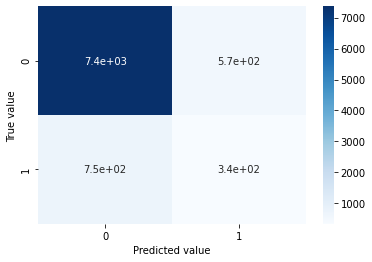

In [37]:
print('Accuracy')
print(mlp.score(PCA_X_test, y_test))

# draw the confusion matrix
predict = mlp.predict(PCA_X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predict)
fig, ax = plt.subplots(1)
ax = sns.heatmap(confusion_matrix, ax=ax, cmap=plt.cm.Blues, annot=True)
plt.ylabel('True value')
plt.xlabel('Predicted value')
plt.show()

The above confusion matrix shows that there are 340 true positives and 7400 false negatives, which is still good for an imbalanced dataset. The number of false positives are 570 and true negatives are 750.

We can find the Mean Squared Error (MSE) and other scores as follows.

In [36]:
from sklearn.metrics import accuracy_score, mean_squared_error

# print the training error and MSE
print("Training error: %f" % mlp.loss_curve_[-1])
print("Training set score: %f" % mlp.score(PCA_X_train, y_train))
print("Test set score: %f" % mlp.score(PCA_X_test, y_test))
print(accuracy_score(y_test, predict))

print("MSE: %f" % mean_squared_error(y_test, predict))

Training error: 0.089377
Training set score: 0.973692
Test set score: 0.853864
0.8538640647521898
MSE: 0.146136
